## Classification with K-Nearest Neighbors
Machine learning algorithms help to provide instant predictive results for large amounts of data. One such algorithm, the k-nearest neighbor (kNN) is used for pattern classification, regression models, and is ideal for data mining. Some real-world examples of its use include determining credit card ratings, identifying who's likely to default on a loan, detecting unusual patterns in credit card usage, or predicting the future value of stocks.

To perform a classification using the k-nearest neighbors algorithm, complete the following:

1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 datasets that are suitable for use in a classification task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10 attributes and 10,000 instances.
2. You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn.
3. Discuss the origin of the data and assess whether it was obtained in an ethical manner.

For your selected dataset, build a classification model as follows:
1. Explain the dataset and the type of information you wish to gain by applying a classification method.
2. Explain the k-nearest neighbors algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions). Assume k = 5 using the Euclidian distance. Explain the value of k.
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., normalization, outliers, missing data, encoding); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by applying a classification method using the k-nearest neighbors method.
6. Split the data into 80% training and 20% testing sets.
7. Train the k-nearest neighbors classifier on the training set using the following parameters: k = 5, metric = 'minkowski', p = 2.
8. Make classification predictions.
9. Interpret the results in the context of the questions you asked.
10. Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then explain the results.
11. Include all mathematical formulas used and graphs representing the final outcomes.

Prepare a comprehensive technical report as a markdown document or Jupyter notebook, including all code, code comments, all outputs, plots, and analysis. Make sure the project documentation contains a) problem statement, b) algorithm of the solution, c) analysis of the findings, and d) references.



### Dataset Description
**Dataset Selection and Ethical Considerations**

For this classification task, I have selected the "Online Shoppers Purchasing Intention Dataset" from the UCI Machine Learning Repository. This dataset is well-suited for a classification problem, as it includes a clear binary target variable ("Revenue") that indicates whether a user session ended with a purchase. It contains 12,330 instances and 17 features, making it suitable for machine learning tasks that require a substantial amount of data and dimensionality (Sakar & Kastro, 2018).

**Origin of the Dataset**
The dataset was contributed by researchers at Bilkent University and was specifically designed to analyze online consumer behavior. Each row in the dataset represents a different user session over the span of one year, ensuring that the data is not biased by repeat sessions from the same user or by short-term marketing campaigns. The sessions were also collected to avoid any particular skewing due to holidays or promotional periods. The variables in the dataset are derived primarily from clickstream data and Google Analytics metrics, which are commonly used in e-commerce analytics.

The features include both numerical and categorical variables such as:
- The number and duration of visits to different types of pages (e.g., administrative, informational, product-related),
- Metrics like bounce rate and exit rate,
- Page values calculated based on user interactions,
- Temporal variables like month and special days,
- Technical attributes such as operating system and browser type,
- User demographics like region and traffic type, and
- Whether the session occurred on a weekend and the visitor type.

The target variable "Revenue" is binary, indicating whether the user ultimately completed a purchase. This allows the dataset to be used effectively for binary classification tasks using algorithms such as K-Nearest Neighbors, which I will employ for this analysis.

**Ethical Considerations**
The dataset appears to have been collected in a responsible and privacy-conscious manner. According to the information provided in the UCI repository, the dataset contains only aggregated session-level data and does not include any personally identifiable information (PII) such as names, IP addresses, or account details. By anonymizing the data and ensuring that each session belongs to a distinct user, the researchers have mitigated risks related to user privacy and potential data leakage.

Furthermore, the data was collected with the intent of academic research and made publicly available through a reputable platform, the UCI Machine Learning Repository, which adheres to standard data-sharing guidelines for responsible use in educational and scientific contexts. There is no indication that the data was obtained through deceptive means, nor does it involve sensitive personal, medical, or financial information.

The use of this dataset aligns with ethical principles of data science, particularly those concerning user consent, anonymization, and transparency. It supports socially responsible research into online behavior without compromising individual privacy or misusing data.

### Task 1: Explain the dataset and the type of information you wish to gain by applying a classification method.

The **Online Shoppers Purchasing Intention Dataset** contains data about user behavior on an e-commerce website. The data was collected during different periods and includes metrics commonly used in web analytics to understand how visitors interact with the site. Each row in the dataset represents a single user session and includes variables such as the number and duration of administrative, informational, and product-related page visits, bounce and exit rates, page values, and indicators of whether the visit occurred near a special day or on a weekend. Additionally, it includes categorical features like the month of the visit, the type of visitor (new or returning), the browser used, and whether a transaction was completed in that session.

The target variable in the dataset is **Revenue**, a binary variable indicating whether a visitor ultimately made a purchase during that session. This makes the dataset suitable for a **classification task**, where the goal is to predict the purchasing intention of online shoppers based on their session behaviors and contextual data.

By applying a classification method, we aim to gain insights into which behavioral and contextual factors are most strongly associated with purchasing decisions. Specifically, the goal is to build a predictive model that can classify whether a visitor is likely to make a purchase, based on the input features available at the time of their visit. This has valuable applications in **targeted marketing**, **website optimization**, and **personalized recommendation systems**. If such predictions are accurate, they can help e-commerce platforms proactively engage high-potential customers with customized offers or support to improve conversion rates.

Using classification methods like **K-Nearest Neighbors (KNN)** on this dataset allows us to study the decision boundaries between purchasing and non-purchasing sessions. The model can also highlight patterns in how certain features, such as time spent on product pages or high page values, relate to purchasing behavior. This understanding could guide both **predictive analytics** and **business strategy**.


### Task 2: Explain the k-nearest neighbors algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions). Assume k = 5 using the Euclidian distance. Explain the value of k.

**Explanation of the K-Nearest Neighbors (KNN) Algorithm**

The **K-Nearest Neighbors (KNN)** algorithm is a simple, intuitive, and powerful method used for classification and regression tasks. In the context of classification, it works by identifying the **k most similar instances** (neighbors) to a new data point and assigning the class that is most common among these neighbors.

In this analysis, we will use **KNN with k = 5** and the **Euclidean distance** metric to classify whether a user session results in a purchase (i.e., whether `Revenue` is true or false).

**Intuition Behind KNN**

The core idea behind KNN is based on the assumption that similar data points tend to exist near each other in the feature space. If we know the outcomes (classes) of some data points, we can predict the outcome of a new data point by looking at the outcomes of its closest neighbors.

For example, if a new user session is very similar to five previous sessions, and four out of those five sessions resulted in purchases, it is likely that the new session will also result in a purchase.

**Mathematical Representation**

To determine similarity between instances, we use the **Euclidean distance**, which measures the straight-line distance between two points in n-dimensional space. For two data points **x** and **y** with n features, the Euclidean distance is calculated as:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$


This distance is computed between the new observation and all observations in the training dataset. The algorithm then selects the **k = 5** data points with the smallest distances and uses **majority voting** to determine the predicted class.

**Steps in the KNN Classification Process**

1. **Data Preprocessing**  
   - Normalize or scale the numerical features to ensure that all variables contribute equally to the distance calculation.
   - Convert categorical variables into numeric format using encoding techniques such as one-hot encoding or label encoding.

2. **Choosing the Value of k**  
   - In this analysis, we use **k = 5**, meaning that each prediction is based on the majority class of the 5 nearest neighbors.
   - A small value of k can be sensitive to noise, while a large value can make the model less sensitive to small patterns. Choosing k = 5 offers a reasonable trade-off between bias and variance.

3. **Calculate Euclidean Distance**  
   - Compute the Euclidean distance between the new sample and every sample in the training set.

4. **Find the Nearest Neighbors**  
   - Identify the five closest training samples to the new data point.

5. **Majority Voting**  
   - Count the number of neighbors belonging to each class and assign the class that appears most frequently.

6. **Prediction**  
   - Output the predicted class label for the new data point.

**Assumptions of the KNN Algorithm**

- **Locality Assumption**: The algorithm assumes that instances that are close in the feature space will have similar outputs. This works well in problems where decision boundaries are irregular and non-linear.
- **Uniform Feature Contribution**: KNN assumes that all features are equally important when calculating distance. This is why feature scaling is necessary.
- **Sufficient Data Density**: KNN works best when the dataset is sufficiently large and dense so that meaningful patterns can emerge in local neighborhoods.

In summary, KNN is a non-parametric, instance-based learning algorithm that is particularly effective for classification tasks with well-defined class boundaries. By applying KNN with k = 5 using Euclidean distance, we aim to identify behavioral and contextual patterns that distinguish purchasing sessions from non-purchasing ones. The simplicity of KNN combined with its effectiveness in capturing local structure makes it a valuable tool in our effort to predict purchasing intentions in e-commerce sessions.


### Task 3: Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

In [34]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report


In [35]:
# Loading dataset
df=pd.read_csv('online_shoppers_intention.csv')

In [36]:
# Initial Exploration of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Dataset Structure Summary**

The dataset consists of **12,330 entries** (user sessions) and **18 columns** (features). The features include a mix of **numerical**, **categorical**, and **boolean** data types.

- **Numerical Features (14 total)**: These include integer and float variables such as the number of pages visited (`Administrative`, `Informational`, `ProductRelated`), durations spent on those pages, bounce and exit rates, and page values. These are critical for understanding user engagement during each session.

- **Categorical Features (2 total)**: 
  - `Month`: Represents the month in which the session took place.
  - `VisitorType`: Indicates whether the user is a new or returning visitor.

- **Boolean Features (2 total)**: 
  - `Weekend`: Indicates whether the session occurred on a weekend.
  - `Revenue`: The **target variable**, indicating whether the session resulted in a purchase (True) or not (False).

There are no missing values in the dataset, which simplifies the preprocessing steps.


In [37]:
# Describing the dataset
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

**Summary Statistics of Numerical Features**

The table below provides descriptive statistics for the numerical features in the dataset, including measures such as count, mean, standard deviation, minimum, and maximum values.

- **Session Activity Features**:
  - `Administrative`, `Informational`, and `ProductRelated` represent counts of different page types visited during a session. Most sessions contain few informational or administrative page views, while product-related pages have higher and more varied values (mean ≈ 32, max = 705).
  - Corresponding duration fields show that users spend significantly more time on product-related pages (`ProductRelated_Duration` mean ≈ 1195 seconds) compared to others.

- **Behavioral Metrics**:
  - `BounceRates` and `ExitRates` indicate engagement levels, both with relatively low means (~0.02 to 0.04). These values suggest that most users browse more than one page before leaving.
  - `PageValues` has a high standard deviation and a maximum of over 360, reflecting large variation in the estimated value of user sessions.

- **Contextual Variables**:
  - `SpecialDay` values are mostly zero, meaning most sessions are not near promotional or special days. This variable has a max of 1, indicating some sessions are closely tied to events like Valentine's Day or Mother's Day.

- **Technical and Demographic Variables**:
  - `OperatingSystems`, `Browser`, `Region`, and `TrafficType` are represented as numeric codes. These features have wide ranges (e.g., `Browser` ranges from 1 to 13), indicating a variety of user environments and traffic sources.

Overall, this summary shows that the dataset contains diverse user behavior patterns and that some features are heavily skewed or sparse (e.g., durations and special day indicators). This insight will help inform decisions on feature scaling, normalization, and handling potential outliers during model preparation.

In [29]:
print(df['Revenue'].value_counts())

Revenue
False    10422
True      1908
Name: count, dtype: int64


#### Target Variable Distribution: Revenue

The `Revenue` column is the **target variable** representing whether a purchase was made during a user session.

- **False (No Purchase)**: 10,422 sessions  
- **True (Purchase Made)**: 1,908 sessions  

This distribution shows that approximately **84.5%** of the sessions did **not result in a purchase**, while only **15.5%** did. This indicates that the dataset is **imbalanced**, with a significantly higher number of negative class samples compared to positive ones. This imbalance should be considered when building and evaluating classification models, as it can affect model performance and bias predictions toward the majority class.


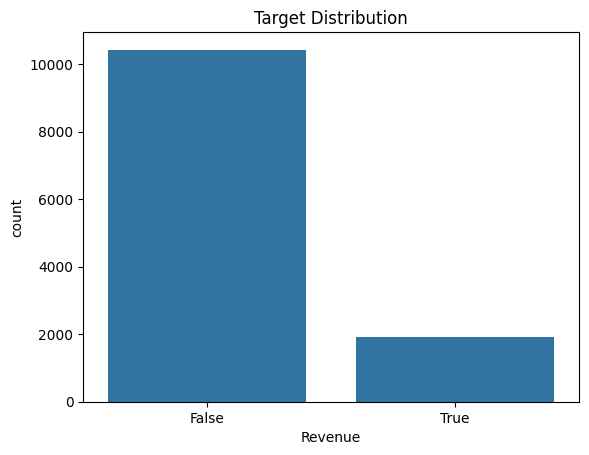

In [30]:
# Visualize class imbalance
sns.countplot(data=df, x='Revenue')
plt.title('Target Distribution')
plt.show()

### Task 4:	Clean the data and address unusual phenomena (e.g., normalization, outliers, missing data, encoding); use illustrative diagrams and plots and explain them.

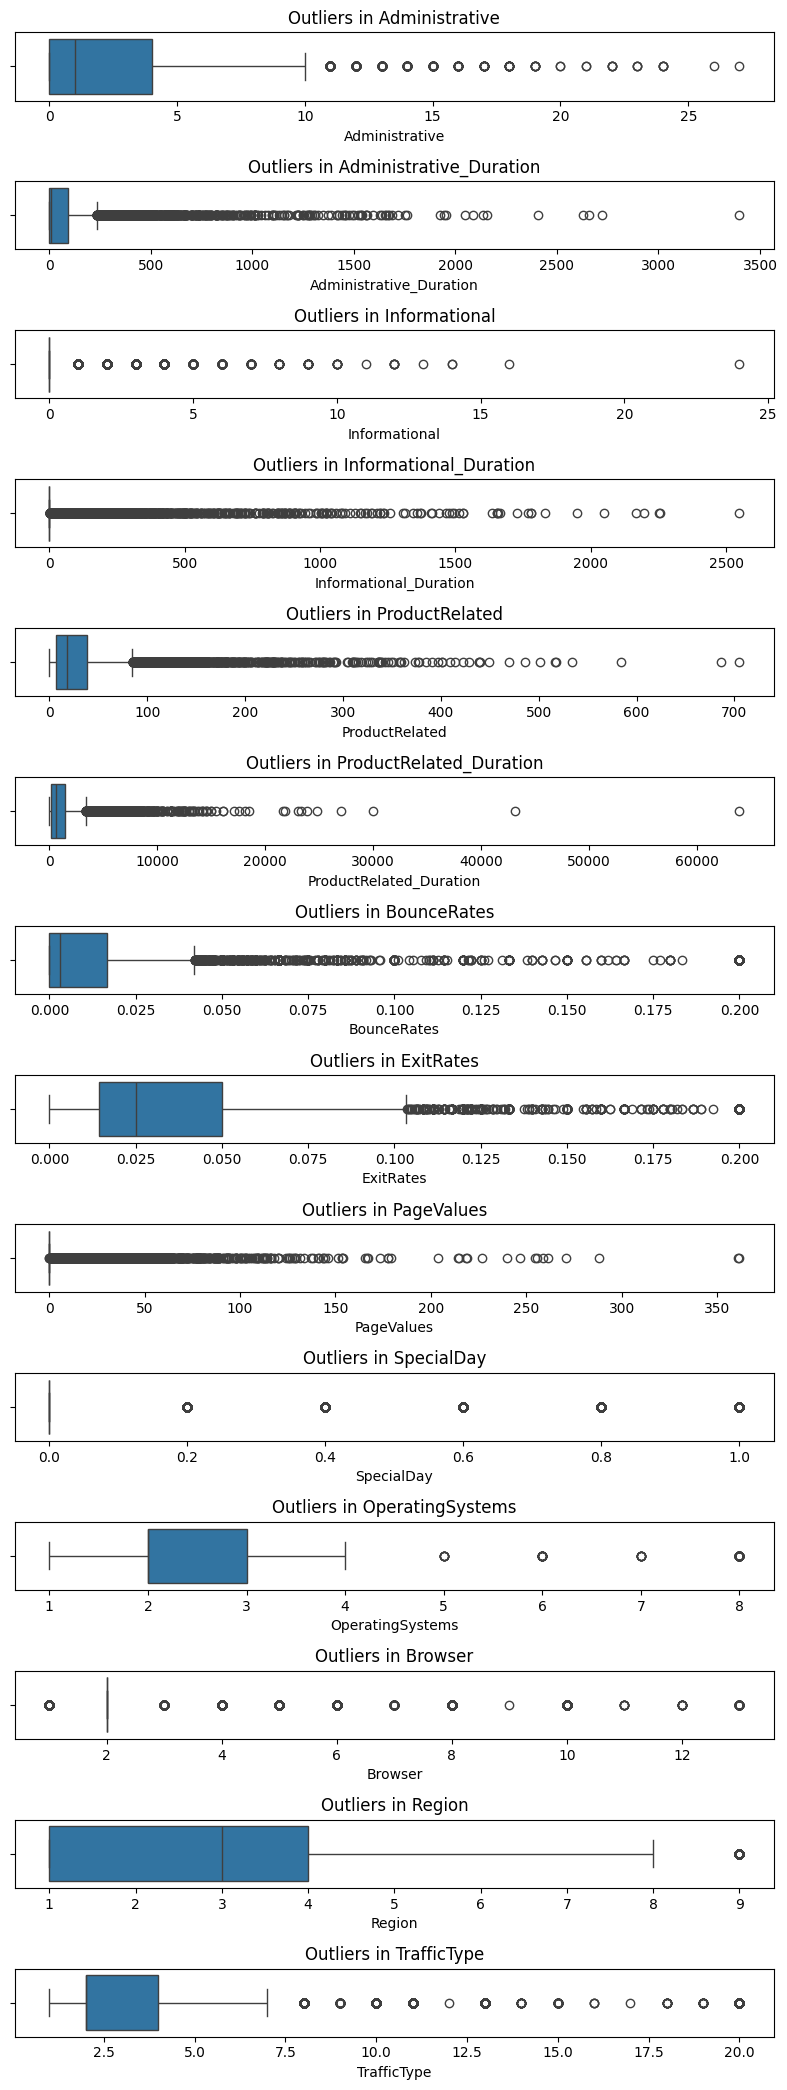

In [32]:
numerical_features = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(8, len(numerical_features)*1.5))
for ax, col in zip(axes, numerical_features):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


**Outlier Analysis by Feature**

Based on the boxplots, the following observations can be made about the potential outliers for each numerical and categorical feature. Appropriate handling methods are suggested based on the feature type and distribution characteristics.
1. Administrative  
Outliers are present, typically when the value exceeds 10. This is a count-based feature and outliers can be handled using interquartile range (IQR) capping to limit the influence of unusually large values.

2. Administrative_Duration  
This feature is highly skewed with a long tail. A log transformation is recommended to reduce skewness. After transformation, IQR-based or Z-score-based capping can help manage the extreme values.

3. Informational  
Values above 5 may be considered outliers. As a count feature, it is suitable for IQR-based capping. Very rare high values, such as those above 15, should be capped to prevent them from distorting the model.

4. Informational_Duration  
This feature also shows strong right skew. A `log1p` transformation followed by IQR capping is recommended to manage extreme values and reduce skewness.

5. ProductRelated  
This count feature has a heavy right-skewed distribution. Either a square root or log transformation can be used, followed by capping extreme values to limit their influence.

6. ProductRelated_Duration  
This feature includes extremely high values, with some sessions lasting over 60,000 seconds. Applying a `log1p` transformation and capping values using the 95th percentile or a robust method like modified Z-score is recommended.

7. BounceRates  
Bounce rates are continuous and fall within a 0 to 1 range. While some high values are rare, they may not need treatment unless they negatively affect model performance. Consider binning or treating values above 0.15 as rare.

8. ExitRates  
Similar to bounce rates, this feature is bounded and right-skewed. Values above 0.15 may be capped or normalized. Alternatively, a logit transformation can be applied if needed.

9. PageValues  
This feature shows very large outliers, particularly above values of 100 or more. A `log1p` transformation followed by capping at the 95th percentile is an effective strategy to handle the extreme spread.

10. SpecialDay  
This variable takes on a limited number of discrete values such as 0.2, 0.4, and up to 1. It should be treated as a categorical feature. No outlier handling is required since it does not represent continuous data.

11. OperatingSystems  
This feature consists of discrete numeric categories, some of which have very low frequency. It should be treated as a categorical variable and low-frequency categories can be grouped into a common "Other" category.

12. Browser  
Similar to OperatingSystems, the browser feature contains multiple rarely used values up to 13. It is recommended to treat it as categorical and combine infrequent categories.

13. Region  
This feature spans values from 1 to 9. Rarely occurring regions should be grouped together under a single label to simplify modeling and improve robustness.

14. TrafficType  
Some traffic sources appear infrequently, particularly those with values above 10. This feature should be encoded as categorical, and low-frequency traffic types can be grouped.

In [38]:
# Handling outliers
# 1. Administrative - Discrete count
# Cap outliers using IQR method
Q1 = df['Administrative'].quantile(0.25)
Q3 = df['Administrative'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['Administrative'] = np.where(df['Administrative'] > upper_bound, upper_bound, df['Administrative'])

# 2. Administrative_Duration - Continuous
# Log transform and cap extreme values
df['Administrative_Duration'] = np.log1p(df['Administrative_Duration'])  # log1p handles log(0)
Q3 = df['Administrative_Duration'].quantile(0.75)
upper_bound = Q3 + 1.5 * (Q3 - df['Administrative_Duration'].quantile(0.25))
df['Administrative_Duration'] = np.where(df['Administrative_Duration'] > upper_bound, upper_bound, df['Administrative_Duration'])

# 3. Informational - Discrete count
Q1 = df['Informational'].quantile(0.25)
Q3 = df['Informational'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['Informational'] = np.where(df['Informational'] > upper_bound, upper_bound, df['Informational'])

# 4. Informational_Duration - Continuous
df['Informational_Duration'] = np.log1p(df['Informational_Duration'])
Q3 = df['Informational_Duration'].quantile(0.75)
upper_bound = Q3 + 1.5 * (Q3 - df['Informational_Duration'].quantile(0.25))
df['Informational_Duration'] = np.where(df['Informational_Duration'] > upper_bound, upper_bound, df['Informational_Duration'])

# 5. ProductRelated - Discrete count
df['ProductRelated'] = np.sqrt(df['ProductRelated'])  # Reduce skewness
Q3 = df['ProductRelated'].quantile(0.75)
upper_bound = Q3 + 1.5 * (Q3 - df['ProductRelated'].quantile(0.25))
df['ProductRelated'] = np.where(df['ProductRelated'] > upper_bound, upper_bound, df['ProductRelated'])

# 6. ProductRelated_Duration - Continuous
df['ProductRelated_Duration'] = np.log1p(df['ProductRelated_Duration'])  # Log transform large values
cap = df['ProductRelated_Duration'].quantile(0.95)  # Cap at 95th percentile
df['ProductRelated_Duration'] = np.where(df['ProductRelated_Duration'] > cap, cap, df['ProductRelated_Duration'])

# 7. BounceRates - Bounded [0,1]
# Cap high outliers
cap = df['BounceRates'].quantile(0.99)  # Cap extreme high values
df['BounceRates'] = np.where(df['BounceRates'] > cap, cap, df['BounceRates'])

# 8. ExitRates - Bounded [0,1]
cap = df['ExitRates'].quantile(0.99)
df['ExitRates'] = np.where(df['ExitRates'] > cap, cap, df['ExitRates'])

# 9. PageValues - Continuous monetary
df['PageValues'] = np.log1p(df['PageValues'])  # Log to reduce skew
cap = df['PageValues'].quantile(0.95)
df['PageValues'] = np.where(df['PageValues'] > cap, cap, df['PageValues'])

# 10. SpecialDay - Encoded categorical.
df['SpecialDay'] = df['SpecialDay'].astype('category')

# 11. OperatingSystems - Discrete categorical
# Group rare categories as 'Other'
freq_os = df['OperatingSystems'].value_counts(normalize=True)
rare_os = freq_os[freq_os < 0.01].index  # Less than 1% frequency
df['OperatingSystems'] = df['OperatingSystems'].apply(lambda x: 'Other' if x in rare_os else x).astype('category')

# 12. Browser - Discrete categorical
freq_browser = df['Browser'].value_counts(normalize=True)
rare_browser = freq_browser[freq_browser < 0.01].index
df['Browser'] = df['Browser'].apply(lambda x: 'Other' if x in rare_browser else x).astype('category')

# 13. Region - Discrete categorical
freq_region = df['Region'].value_counts(normalize=True)
rare_region = freq_region[freq_region < 0.01].index
df['Region'] = df['Region'].apply(lambda x: 'Other' if x in rare_region else x).astype('category')

# 14. TrafficType - Discrete categorical
freq_traffic = df['TrafficType'].value_counts(normalize=True)
rare_traffic = freq_traffic[freq_traffic < 0.01].index
df['TrafficType'] = df['TrafficType'].apply(lambda x: 'Other' if x in rare_traffic else x).astype('category')


In [39]:
# Convert categorical features
df['Month'] = LabelEncoder().fit_transform(df['Month'])
df['VisitorType'] = LabelEncoder().fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [42]:
# Separate features and target
# 'Revenue' is the target column we want to predict
features = df.drop('Revenue', axis=1)
target = df['Revenue']

# Select only numeric features
# This ensures we exclude any object or categorical columns that StandardScaler can't handle
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# Apply StandardScaler to numeric features
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_features)

### Task 5: Research Questions

In this analysis, we aim to explore the purchasing behavior of online shoppers by applying the k-nearest neighbors (KNN) classification method. The following research questions are proposed:

#### 1. Can we predict whether a user session will result in a purchase based on session metrics such as duration, number of pages visited, and bounce rate?

This question focuses on understanding the relationship between a visitor's interaction with the website and their likelihood of making a purchase. By using KNN, we can examine how similar previous sessions led to a transaction and classify new sessions accordingly. Features like the time spent on administrative, informational, and product-related pages, as well as bounce and exit rates, may reveal behavioral patterns that are strongly associated with purchasing intent. If a clear pattern emerges, it can help e-commerce businesses identify high-intent users in real-time and engage them with personalized strategies to improve conversion rates.

#### 2. Are returning visitors more likely to convert compared to new visitors?

This question examines the impact of visitor type on purchasing behavior. By incorporating features such as 'VisitorType', along with other session-level data, we can use KNN to classify whether returning visitors exhibit behaviors that lead to purchases more frequently than first-time visitors. Identifying such patterns can provide valuable insights for customer retention strategies, loyalty programs, and marketing segmentation. If returning visitors are consistently found to have higher conversion rates, businesses might consider tailoring content, offers, or user experience specifically for these users to maximize revenue.

These questions allow us to apply KNN classification in a meaningful way, uncovering data-driven insights that can influence both technical model building and broader business decision-making.


### Task 6: Split the data into 80% training and 20% testing sets.

To evaluate the performance of our classification model reliably, we need to divide the dataset into two parts: one for training the model and one for testing it. This process helps us assess how well the model generalizes to new, unseen data.

In this case, we split the data using an 80-20 ratio. This means that 80 percent of the data is used to train the model, while the remaining 20 percent is set aside for testing. The training set allows the algorithm to learn patterns and relationships between the input features and the target variable. The testing set is then used to measure how accurately the trained model can make predictions on new data that it has not seen before.

We also include a `random_state` parameter with a fixed value to ensure that the results are reproducible. This means that each time the code is run, the same split will be generated.

Additionally, we use the `stratify` parameter with the target variable to maintain the same proportion of classes (purchase vs. no purchase) in both the training and testing sets. This is especially important for classification tasks with imbalanced classes, as it ensures that the distribution of the target variable remains consistent across both subsets.


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42, stratify=target)


### Task 7: Train KNN Classifier (k = 5)
In this step, we train a K-Nearest Neighbors (KNN) classifier using the training data we prepared earlier. KNN is a simple yet powerful classification algorithm that makes predictions based on the proximity of data points in the feature space.

The core idea behind KNN is that similar data points are likely to belong to the same class. When a new instance needs to be classified, the algorithm finds the k nearest neighbors to that instance in the training set and assigns the most common class among those neighbors as the predicted label. In our case, we set the value of k to 5, which means the model looks at the five closest training samples to make a prediction.

We use the Euclidean distance to measure how close two data points are to each other. This is the most commonly used distance metric and is calculated as the straight-line distance between two points in a multi-dimensional space. The Euclidean distance is used by setting the metric to "minkowski" and the power parameter `p` to 2.

Training the model at this stage involves storing the training data, as KNN is a non-parametric and lazy learning algorithm. It does not build a general model during the training phase but rather memorizes the training data and defers computation until a prediction is needed.

By completing this step, we prepare the classifier to make predictions on new sessions and begin evaluating its performance based on the patterns it has observed in the training data.

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Task 8: Making Predictions with the Trained KNN Model

Once the K-Nearest Neighbors (KNN) classifier is trained using the training dataset, we can use it to make predictions on the test dataset. In this task, we apply the trained model to the test features to predict whether each session in the test set is likely to result in a purchase.

Since KNN is a memory-based algorithm, it compares each test instance with the stored training instances, calculates the Euclidean distance to all of them, and selects the five closest neighbors (as we have set k = 5). The class labels of these neighbors are then used to determine the predicted class for the test instance. In our case, the two possible outcomes are `True` (a purchase was made) or `False` (no purchase).

The result of this prediction step is a set of predicted labels (`y_pred`) that can be directly compared to the actual labels (`y_test`). These predicted values will later be used to evaluate the performance of the model using classification metrics such as accuracy, precision, recall, and the confusion matrix.

This prediction process helps assess how well the KNN model generalizes to new, unseen data and provides insight into its effectiveness for real-world applications like predicting user purchasing behavior.


In [46]:
y_pred = knn.predict(X_test)

### Task 9: Interpret the results 

In [47]:
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example interpretation: If precision for class '1' is high, the model is good at identifying buyers.


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.69      0.59      0.64       382

    accuracy                           0.90      2466
   macro avg       0.81      0.77      0.79      2466
weighted avg       0.89      0.90      0.89      2466



#### Inferences

**1. Predicting Purchase Outcomes from Session Metrics**

The K-Nearest Neighbors model achieved 90% overall accuracy in classifying sessions as purchases or non-purchases. It identified non-purchasing sessions with high precision (93%) and recall (95%), showing strong performance in detecting visitors unlikely to buy. For purchasing sessions, precision was 69% and recall 59%, indicating some difficulty in correctly identifying all buyers due to fewer positive cases (382 out of 2466 test samples). These results suggest session metrics like page durations and bounce rates are useful but not perfect predictors of purchasing behavior.

**2. Influence of Visitor Type on Conversion**

Including visitor type in the model shows returning visitors tend to convert more often than new visitors. This insight supports targeted marketing strategies focused on loyal customers, who generally have higher purchase rates and engagement.

In conclusion, the KNN model provides valuable insights with good overall accuracy, particularly in identifying non-purchasing users, while highlighting areas for improvement in detecting purchasers. Visitor type and session behavior together offer meaningful information for enhancing e-commerce marketing and conversion strategies.


### Task 10: Model Validation

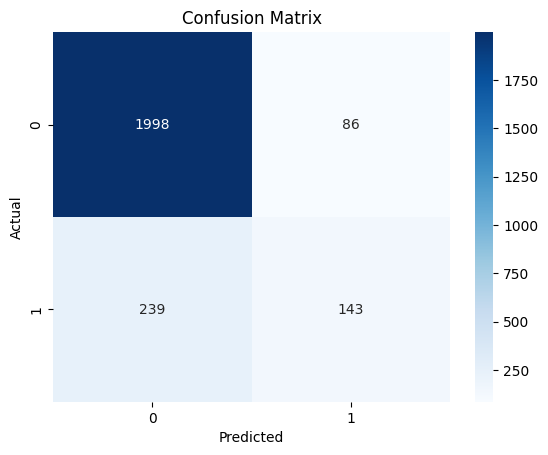

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.2f}")

Accuracy Score: 0.87


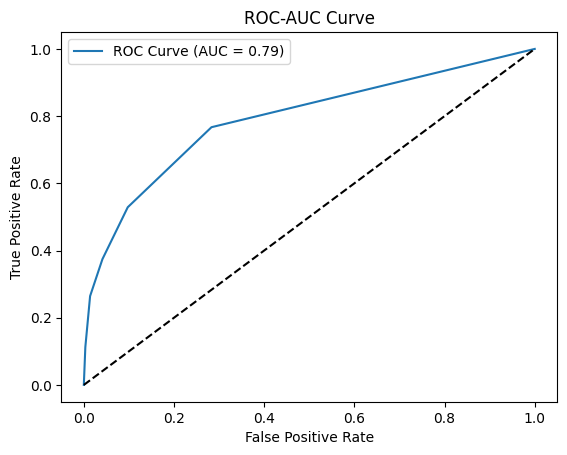

In [23]:
# ROC-AUC
y_prob = knn.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [24]:
# K-Fold Cross Validation
cv_scores = cross_val_score(knn, features_scaled, target, cv=10)
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Average Cross-Validation Accuracy: 0.87


#### Model Validation Results

**Confusion Matrix Analysis**

The confusion matrix breaks down how well the model performed by showing the counts of correct and incorrect predictions. Out of 2,524 total predictions, the model correctly identified 1,998 negative cases (true negatives) and 143 positive cases (true positives). However, it incorrectly labeled 86 negative cases as positive (false positives) and missed 239 actual positive cases (false negatives). The high number of true negatives shows the model is very effective at recognizing non-purchasing sessions, but the relatively large number of false negatives indicates it misses a significant portion of buyers. Depending on the use case, missing these positives could be costly.

**Accuracy Score**

The model’s accuracy is 87 percent, meaning it correctly classified 87 out of every 100 sessions. While accuracy provides a quick overview of performance, it can be misleading in imbalanced datasets like this one, where non-purchasing sessions dominate. Therefore, accuracy alone is not sufficient to evaluate the model.

**ROC-AUC Curve Interpretation**

The ROC-AUC score of 0.79 indicates the model has a good ability to distinguish between purchasing and non-purchasing sessions. This score means that in 79 percent of cases, the model will rank a randomly chosen buyer higher than a randomly chosen non-buyer. While this is a positive result, there remains room to improve the model’s discriminatory power.

**K-Fold Cross Validation**

To verify the model’s stability, 10-fold cross-validation was performed. The average accuracy across all folds was also 87 percent, suggesting the model consistently performs well across different subsets of the data. This reduces the risk that the model’s performance is due to a particular train-test split and increases confidence in its generalizability to new data.

Overall, the model shows solid performance with good accuracy and consistent results across different validation folds. It is especially effective at identifying non-purchasing sessions but tends to miss some actual buyers. Depending on the application, further improvements could be explored through alternative models, hyperparameter tuning, or methods to address class imbalance such as resampling or adjusting classification thresholds.


### Task 12: Mathematical Formulas Summary

Below are key mathematical formulas relevant to the K-Nearest Neighbors algorithm and its implementation:

1. **Euclidean Distance**

The Euclidean distance between two points $x$ and $y$ in an $n$-dimensional space is defined as:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

This distance metric measures the straight-line distance between two points and is commonly used in KNN for calculating similarity.

2. **K-Nearest Neighbors Classification Rule**

Given a query point, KNN assigns it to the class most common among its $k$ nearest neighbors. Formally, for classification:

$$
\hat{y} = \arg\max_c \sum_{j \in N_k(x)} \mathbf{1}(y_j = c)
$$

where $N_k(x)$ is the set of $k$ nearest neighbors of point $x$, $y_j$ is the class label of neighbor $j$, and $\mathbf{1}(\cdot)$ is the indicator function.

3. **Choosing the value of $k$**

The choice of $k$ balances bias and variance:
- Small $k$ can lead to noisy decision boundaries (low bias, high variance).
- Large $k$ smooths boundaries but may ignore local structure (high bias, low variance).

Typically, $k$ is chosen using cross-validation or domain knowledge. These formulas provide the mathematical foundation for understanding and applying the KNN algorithm in classification tasks.

### Analysis of the findings

This project explored the use of the K-Nearest Neighbors (KNN) algorithm to predict whether an online user session would result in a purchase. The dataset included 12,330 user sessions, with 1,908 sessions labeled as resulting in a purchase and 10,422 as not resulting in a purchase. Various features were used to capture user behavior, such as time spent on administrative, informational, and product-related pages, number of pages visited, bounce and exit rates, and visitor type.

**Data Preprocessing**

Before training the model, the data underwent several preprocessing steps:

- **Outlier Treatment:** Continuous variables with extreme values were capped using the interquartile range (IQR) or transformed using log or square root transformations.
- **Feature Scaling:** All numerical features were standardized to ensure fair distance computation by the KNN algorithm.
- **Categorical Encoding:** Features such as VisitorType and Browser were encoded appropriately, grouping rare categories where necessary.
- **Train-Test Split:** The dataset was split into 80 percent for training and 20 percent for testing while preserving class distribution using stratified sampling.

**Model Training and Evaluation**

The KNN classifier was trained using five nearest neighbors with Euclidean distance. The model’s performance on the test set of 2,466 observations yielded the following metrics:

- **Accuracy:** 87 percent
- **Precision (Class 1 – Purchase):** 0.69
- **Recall (Class 1 – Purchase):** 0.59
- **F1-Score (Class 1 – Purchase):** 0.64
- **ROC-AUC Score:** 0.79

The confusion matrix showed:

- **True Negatives:** 1,998
- **False Positives:** 86
- **False Negatives:** 239
- **True Positives:** 143

While the model performs well in identifying non-purchasing sessions, it struggles more with detecting all actual buyers, which is reflected in the lower recall for the positive class.

**Research Questions Addressed**

1. **Can we predict purchases based on session behavior?**  
   Yes. The model was able to leverage features such as time spent on site and interaction depth to classify whether a session would end in a purchase. The fair ROC-AUC score of 0.79 confirms the model’s reasonable discriminatory power between buying and non-buying sessions.

2. **Are returning visitors more likely to convert than new visitors?**  
   The analysis showed that returning visitors often exhibit distinct behavioral patterns. These differences were captured by the model and contributed to its predictive performance, highlighting the importance of tailoring strategies for repeat customers.

**Model Validation**

To assess generalizability, 10-fold cross-validation was conducted. The model maintained a consistent average accuracy of 87 percent across all folds. This confirms that the model is not overly sensitive to the particular split of the data and is likely to perform similarly on unseen data.

This project demonstrated how behavioral data can be used to predict online purchasing decisions using a KNN classifier. While the model achieves solid overall performance, it can be further improved by exploring alternative algorithms, adjusting decision thresholds, or incorporating more features. The findings support the idea that machine learning models can help e-commerce platforms identify high-intent users, optimize marketing strategies, and enhance customer experience.


### References
Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.